In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

In [2]:
train_path = "../dataset/UNSW_NB15_training-set.csv"
test_path = "../dataset/UNSW_NB15_testing-set.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print("Train Shape:", df_train.shape)
print("Test Shape:", df_test.shape)

Train Shape: (82332, 45)
Test Shape: (175341, 45)


In [3]:
X_train = df_train.drop(columns=["label", "attack_cat"], errors="ignore")
y_train = df_train["label"]

X_test = df_test.drop(columns=["label", "attack_cat"], errors="ignore")
y_test = df_test["label"]

In [6]:
import numpy as np
import pandas as pd

for col in X_train.columns:
    if pd.api.types.is_numeric_dtype(X_train[col]):
        X_train[col] = pd.to_numeric(X_train[col], errors="coerce")
        X_test[col] = pd.to_numeric(X_test[col], errors="coerce")
        mean_val = X_train[col].mean()
        X_train[col] = X_train[col].fillna(mean_val)
        X_test[col] = X_test[col].fillna(mean_val)
    else:
        mode_val = X_train[col].mode()[0]
        X_train[col] = X_train[col].fillna(mode_val)
        X_test[col] = X_test[col].fillna(mode_val)

print("Missing values handled")

Missing values handled


In [7]:
cat_cols = X_train.select_dtypes(include=["object"]).columns

for col in cat_cols:
    le = LabelEncoder()
    combined = pd.concat([X_train[col], X_test[col]], axis=0)
    le.fit(combined)

    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

print("Categorical encoding done")

Categorical encoding done


C:\Users\HP\AppData\Local\Temp\ipykernel_16632\3755695024.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X_train.select_dtypes(include=["object"]).columns


In [8]:
et_model = ExtraTreesClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

et_model.fit(X_train, y_train)

y_pred = et_model.predict(X_test)

print("Extra Trees trained successfully")

Extra Trees trained successfully


In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6839700925624925

Confusion Matrix:
 [[54053  1947]
 [53466 65875]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.97      0.66     56000
           1       0.97      0.55      0.70    119341

    accuracy                           0.68    175341
   macro avg       0.74      0.76      0.68    175341
weighted avg       0.82      0.68      0.69    175341



ROC-AUC Score: 0.8867982992463372


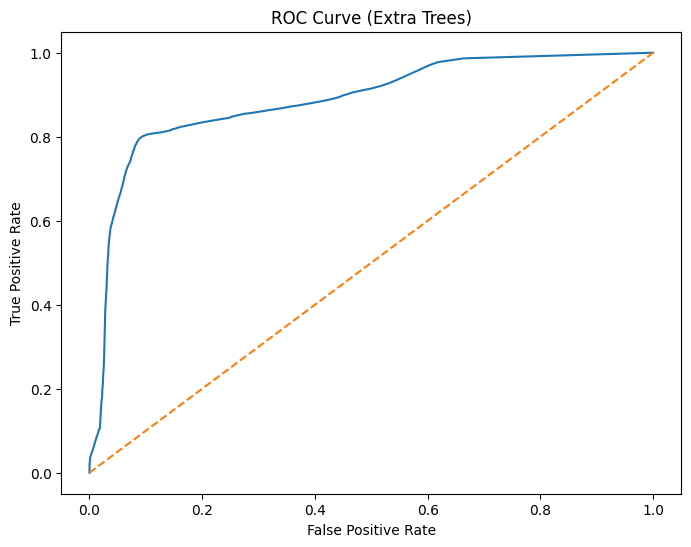

In [10]:
y_probs = et_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Extra Trees)")
plt.show()

PR-AUC Score: 0.9324073398368071


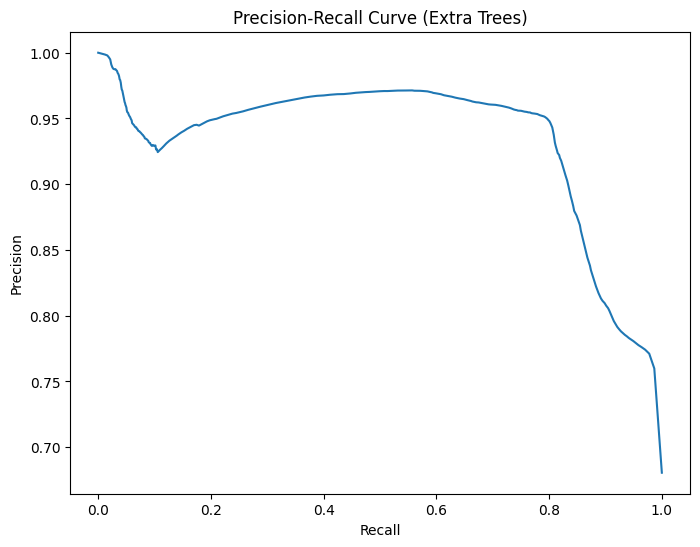

In [11]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = average_precision_score(y_test, y_probs)

print("PR-AUC Score:", pr_auc)

plt.figure(figsize=(8,6))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Extra Trees)")
plt.show()